- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases 
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently - purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [1]:
#import the necessary modul
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
print(df.shape) #(8950, 18)
print(df.columns) #['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

(8950, 18)
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
print(df.isnull().any())
print(df.isnull().sum())

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES          

In [7]:
df_remove_null = df.dropna()
print(df_remove_null.shape) #(8636, 18)
print(df_remove_null.isnull().any())

(8636, 18)
CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool


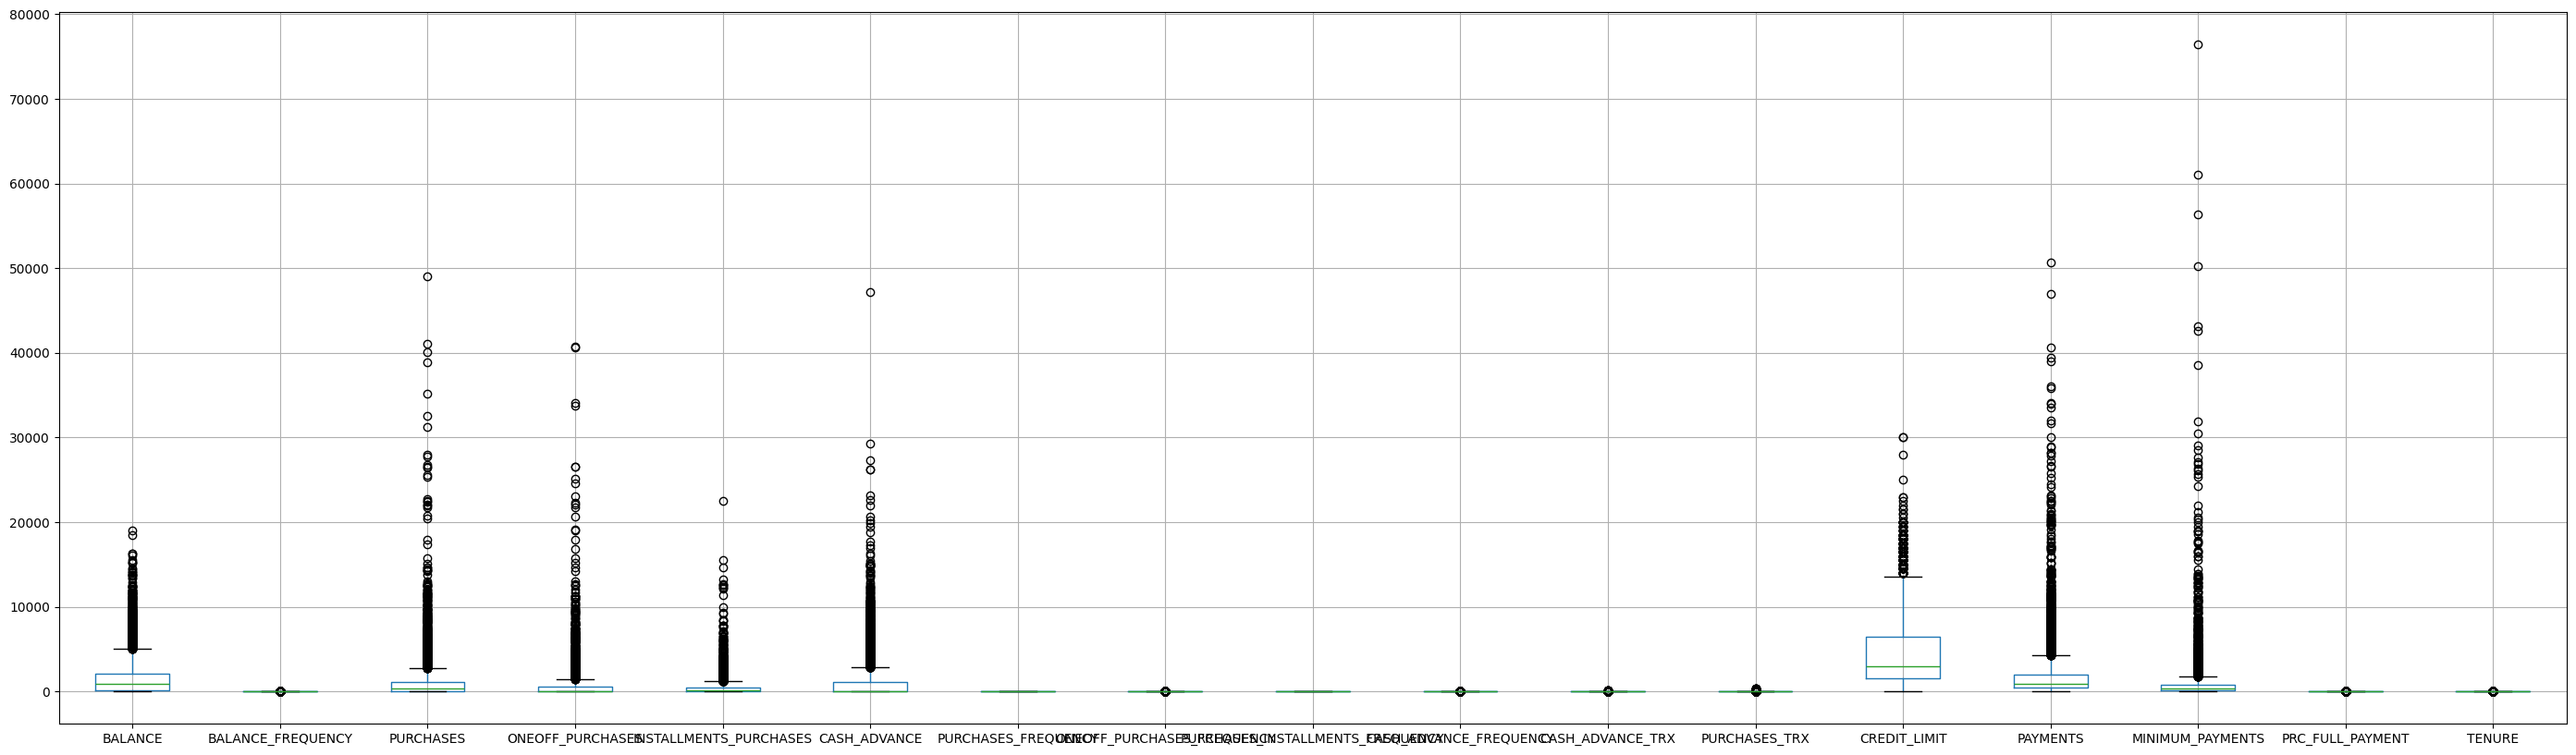

In [8]:
plt.figure(figsize=(35,10))
df_remove_null.boxplot()
plt.show()

In [9]:
#drop the cust id
df = df_remove_null.drop('CUST_ID',axis=1)
df_filtered = df


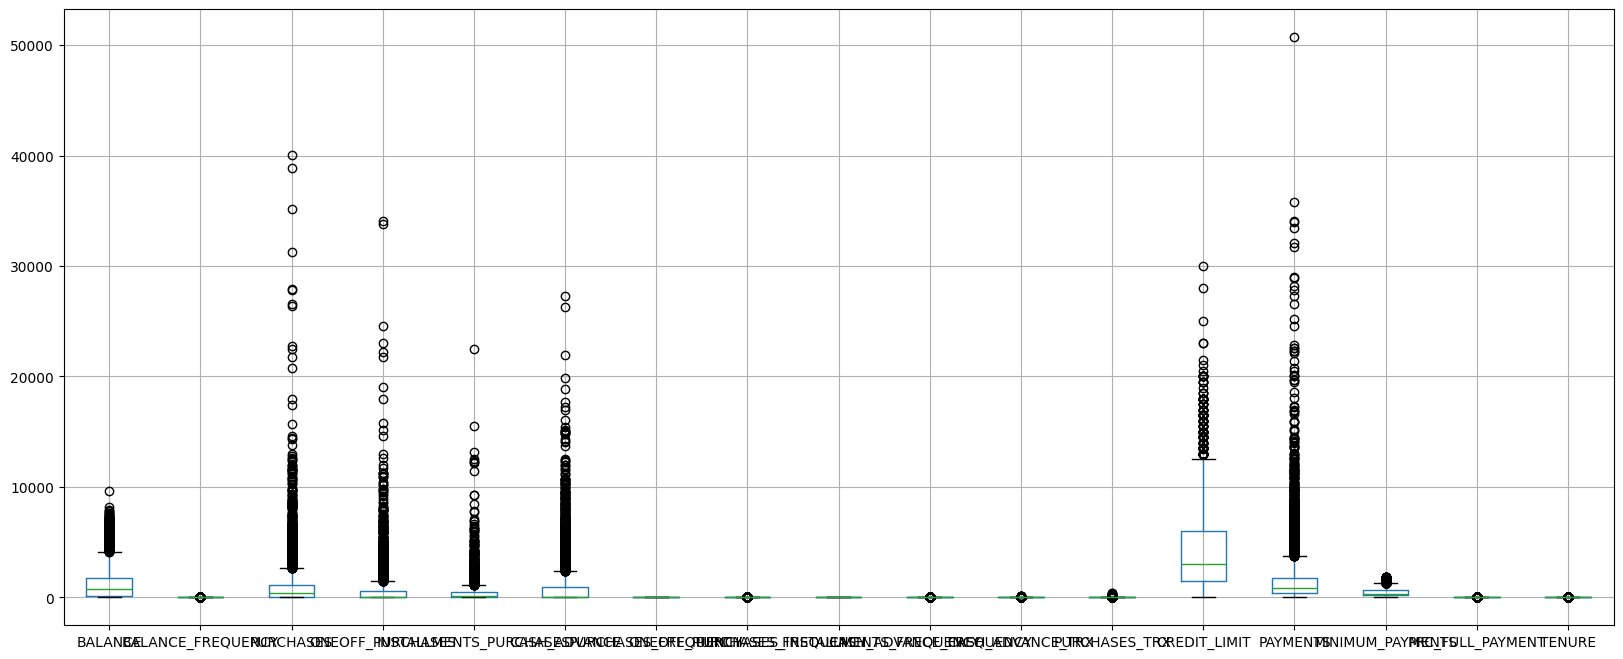

In [10]:
out = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for i in out:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[(df[i] < Q3 + (1.5 * IQR)) & (df[i] > Q1 - (1.5 * IQR) )]

#plot the boxplot for df_filtered
plt.figure(figsize=(20,8))
df_filtered.boxplot()
plt.show()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.348301,0.099226,0.115180,0.027662,0.487592,-0.150263,0.054972,-0.143241,0.460823,0.366027,0.060735,0.391244,0.238991,0.856732,-0.373564,0.035349
BALANCE_FREQUENCY,0.348301,1.000000,0.129588,0.106271,0.112589,0.074838,0.239732,0.198736,0.189697,0.172166,0.123568,0.193506,0.061868,0.017758,0.329060,-0.138926,0.093747
PURCHASES,0.099226,0.129588,1.000000,0.913104,0.708908,-0.081907,0.413647,0.528298,0.325774,-0.142483,-0.091783,0.722045,0.357533,0.587723,0.058228,0.226601,0.090569
ONEOFF_PURCHASES,0.115180,0.106271,0.913104,1.000000,0.359784,-0.057820,0.291868,0.570136,0.134763,-0.102090,-0.066480,0.606777,0.320412,0.556689,0.065916,0.168114,0.071574
INSTALLMENTS_PURCHASES,0.027662,0.112589,0.708908,0.359784,1.000000,-0.087551,0.441690,0.222625,0.512343,-0.149542,-0.095123,0.602830,0.263825,0.381997,0.019141,0.227722,0.083441
CASH_ADVANCE,0.487592,0.074838,-0.081907,-0.057820,-0.087551,1.000000,-0.250855,-0.111511,-0.207655,0.631146,0.617585,-0.108847,0.225682,0.432695,0.409930,-0.154448,-0.097505
PURCHASES_FREQUENCY,-0.150263,0.239732,0.413647,0.291868,0.441690,-0.250855,1.000000,0.505566,0.856761,-0.334098,-0.232764,0.584137,0.142290,0.090796,-0.094632,0.327604,0.051313
ONEOFF_PURCHASES_FREQUENCY,0.054972,0.198736,0.528298,0.570136,0.222625,-0.111511,0.505566,1.000000,0.136251,-0.133217,-0.090677,0.572523,0.308730,0.250330,0.020671,0.162736,0.085794
PURCHASES_INSTALLMENTS_FREQUENCY,-0.143241,0.189697,0.325774,0.134763,0.512343,-0.207655,0.856761,0.136251,1.000000,-0.283937,-0.196479,0.540086,0.069540,0.069842,-0.083086,0.274235,0.062641
CASH_ADVANCE_FREQUENCY,0.460823,0.172166,-0.142483,-0.102090,-0.149542,0.631146,-0.334098,-0.133217,-0.283937,1.000000,0.796951,-0.160227,0.054689,0.156423,0.383591,-0.257318,-0.165009


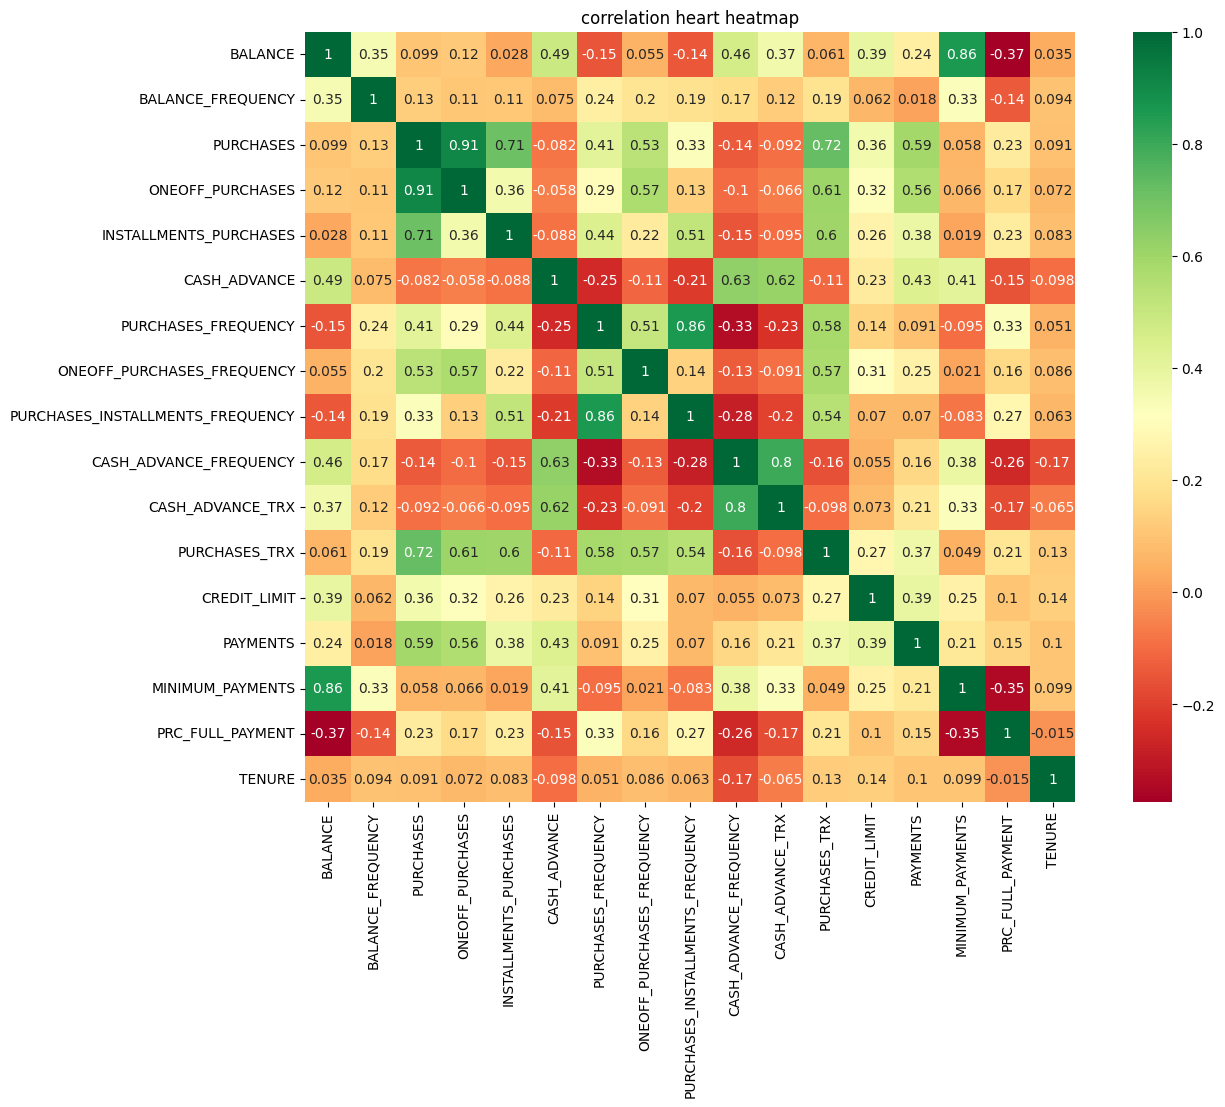

In [11]:
#heatmap of the data 
plt.figure(figsize=(15,10))
sns.heatmap(df_filtered.corr(), square=True, cmap="RdYlGn", annot=True)
plt.title("correlation heart heatmap")
df_filtered.corr()

In [12]:
#initialize StandardScaler
scale = StandardScaler()
#fit the scale
scale_fit = scale.fit_transform(df_filtered)
df_preprocessed = pd.DataFrame(scale_fit, columns=df_filtered.columns)

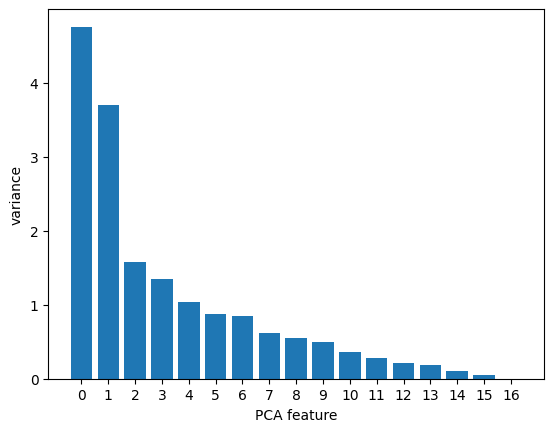

2


In [13]:
#initialize PCA
pca = PCA()

#fit the PCA model with df_preprocessed
pca.fit(df_preprocessed)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

#find the number of components
n_components = sum(pca.explained_variance_ratio_>0.1)
print(n_components)

In [14]:
#run PCA again with the n_components=2
pca=PCA(n_components=n_components)

#fit the pca
pca_fit = pca.fit_transform(df_preprocessed)

df_PCA = pd.DataFrame(pca_fit)
#df_PCA = pca.transform(df_preprocessed)
pca.n_features_in_

17

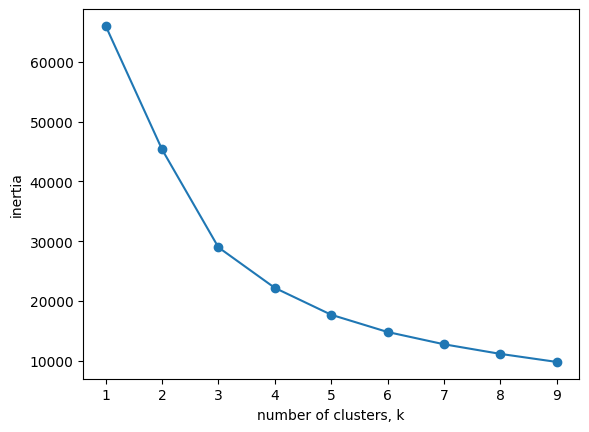

In [15]:
#determine the number of cluster using elbow method
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_PCA)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [16]:
# Silhouette analysis
clusters = range(2,10)

for i in clusters:   
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_PCA)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_PCA, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3549442053556563
For n_clusters=3, the silhouette score is 0.43460417928463085
For n_clusters=4, the silhouette score is 0.3849147442985367
For n_clusters=5, the silhouette score is 0.38427205288225114
For n_clusters=6, the silhouette score is 0.35838788034378993
For n_clusters=7, the silhouette score is 0.35798739053879075
For n_clusters=8, the silhouette score is 0.37087123223565704
For n_clusters=9, the silhouette score is 0.357945254555573


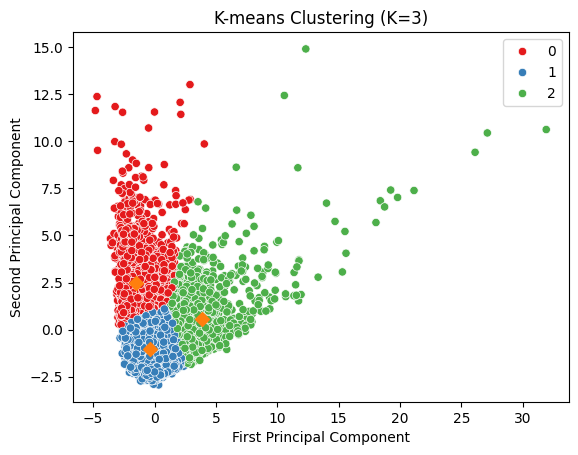

In [17]:
#create the kmeans instance with 3 cluster
model = KMeans(n_clusters=3, random_state=42)
#fit model
kmeans = model.fit(df_PCA)

#plot the clustering
#assign feature column 0 and 1 as xs and ys
xs = df_PCA.iloc[:,0]
ys = df_PCA.iloc[:,1]
#assign the cluster centers: centroids
centroids = kmeans.cluster_centers_
#assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
#make the scatter plot
sns.scatterplot(x=xs, y=ys , hue=kmeans.labels_, palette='Set1')
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K=3)')
plt.show()

In [18]:
df_filtered['label'] = kmeans.labels_
numeric_columns = df_filtered.columns
stat_cc = df_filtered.groupby('label')[numeric_columns].mean()
stat_cc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
label,,,,,,,,,,,,,,,,,,
0,2772.971145,0.953571,312.619388,214.442277,98.196974,2845.527354,0.201368,0.100309,0.113827,0.375104,9.492563,4.370137,5304.474378,2345.313492,852.737235,0.032814,11.355263,0.0
1,582.672555,0.840120,515.260168,259.477920,256.178645,227.834686,0.496622,0.142175,0.367142,0.054321,0.911349,9.105210,3187.794208,857.260116,286.280923,0.188066,11.465267,1.0
2,1512.341168,0.979524,3893.337689,2497.626228,1396.279498,340.128383,0.947951,0.669683,0.741753,0.052645,1.204566,52.098630,7339.863014,3772.424726,490.586118,0.335517,11.918721,2.0


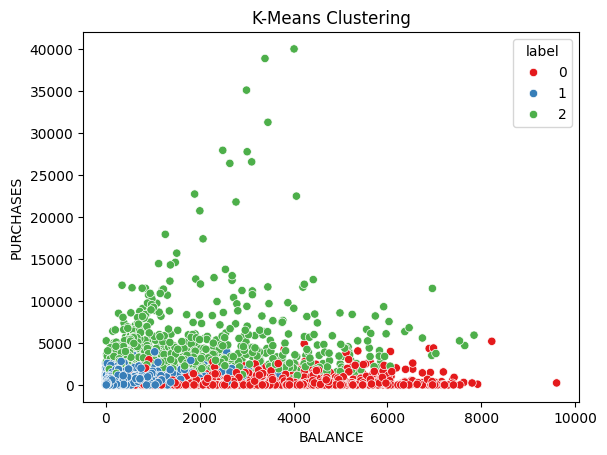

In [19]:
sns.scatterplot(data=df_filtered, x='BALANCE', y='PURCHASES', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

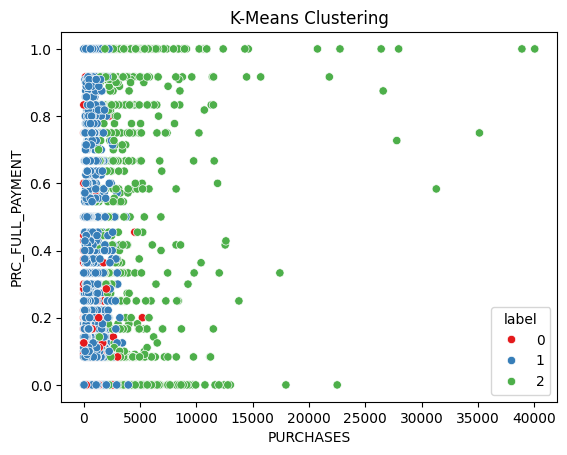

In [21]:
sns.scatterplot(data=df_filtered, x='PURCHASES', y='PRC_FULL_PAYMENT', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

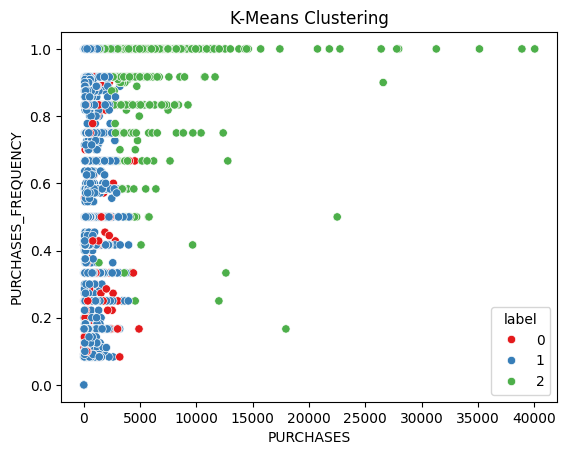

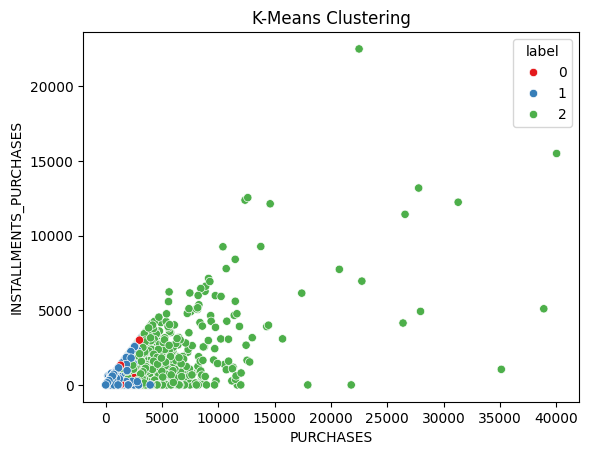

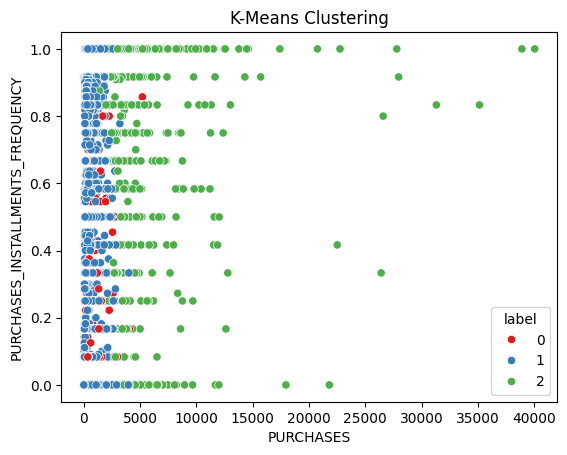

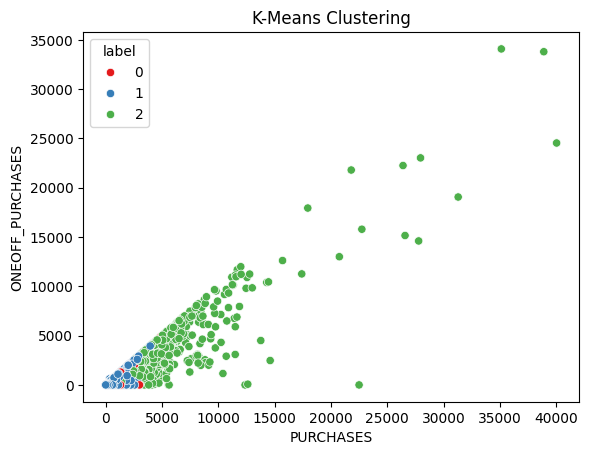

In [20]:
sns.scatterplot(data=df_filtered, x='PURCHASES', y='PURCHASES_FREQUENCY', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()
sns.scatterplot(data=df_filtered, x='PURCHASES', y='INSTALLMENTS_PURCHASES', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()
sns.scatterplot(data=df_filtered, x='PURCHASES', y='PURCHASES_INSTALLMENTS_FREQUENCY', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()
sns.scatterplot(data=df_filtered, x='PURCHASES', y='ONEOFF_PURCHASES', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()

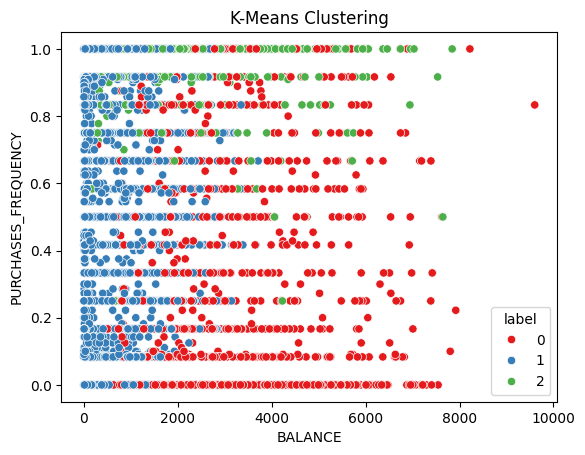

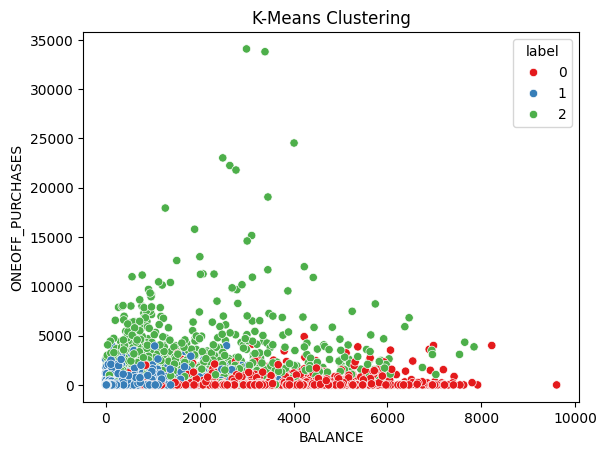

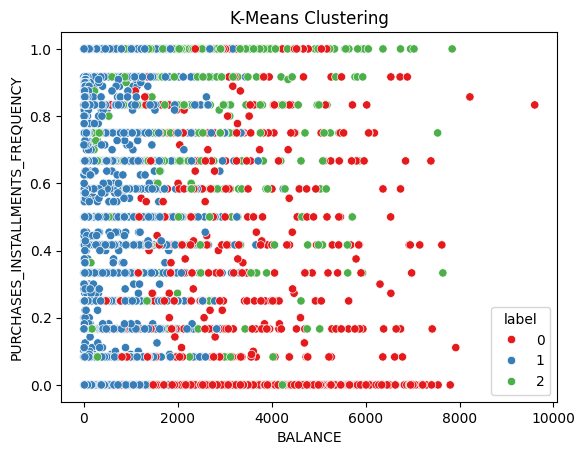

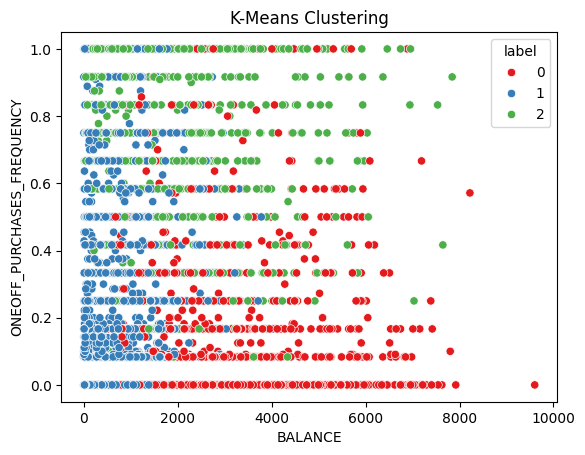

In [22]:
sns.scatterplot(data=df_filtered, x='BALANCE', y='PURCHASES_FREQUENCY', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()
sns.scatterplot(data=df_filtered, x='BALANCE', y='ONEOFF_PURCHASES', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()
sns.scatterplot(data=df_filtered, x='BALANCE', y='PURCHASES_INSTALLMENTS_FREQUENCY', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()
sns.scatterplot(data=df_filtered, x='BALANCE', y='ONEOFF_PURCHASES_FREQUENCY', hue='label', palette='Set1')
plt.title('K-Means Clustering')
plt.show()


- The keys finding for the card credits dataset was divide into 3 cluster. The cluster 0 is the customer have high balance and high advance user. This customers cluster is one new to the credit card. We can promote the budget-friendly vehicle to them. Next, cluster 1 is customer have low balance and cautious spenders. We can promote the affordable cars with low of fuel consumption. Lastly, the cluster 2 is customers with high purchase frequency and high credit limit. the cluster 2 is customers often use the credit card to purchase. We can promote the good performance and specification vehicles. 